In [ ]:
#Connectiome: Computing growth vectors
#https://balsa.wustl.edu/about/fileTypes

In [35]:
#!pip install nibabel #https://github.com/nipy/nibabel
import numpy as np
import nibabel as nb
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
#Data 
#noninjured.L.ab
baseFolder  = 'C:\\RaghusWork\\Data\\GarciaPNAS2018_example\\noninjured.L.ab'
youngerFile = 'YAS.LLR.surf.gii'
olderRegFile = 'configincaltrelaxforward.anat.LLR.reg.surf.gii'

In [3]:
img = nb.load(os.path.join(baseFolder, youngerFile))
younger_coords = img.agg_data('NIFTI_INTENT_POINTSET')
younger_triangles = img.agg_data('NIFTI_INTENT_TRIANGLE')
img = nb.load(os.path.join(baseFolder, olderRegFile))
olderReg_coords = img.agg_data('NIFTI_INTENT_POINTSET')
olderReg_triangles = img.agg_data('NIFTI_INTENT_TRIANGLE')

In [5]:
print(np.array_equal(younger_triangles, olderReg_triangles))
print(np.array_equal(younger_coords,olderReg_coords))

True
False


In [6]:
#compute growth vectors
growthVector = olderReg_coords - younger_coords

In [8]:
print(growthVector.shape,younger_coords.shape)

(10242, 3) (10242, 3)


In [12]:
younger_coords[::2,1].shape

(5121,)

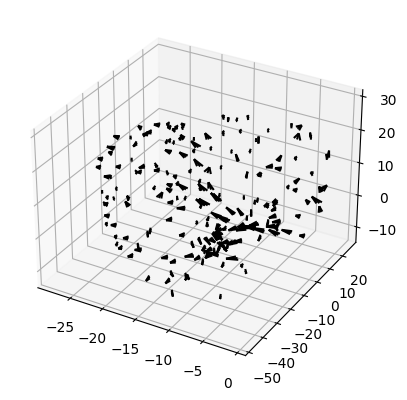

In [43]:
fig = plt.figure()
ax = plt.axes(projection="3d")
stride = 50
x = younger_coords[::stride,0]
y = younger_coords[::stride,1]
z = younger_coords[::stride,2]
u = growthVector[::stride,0]
v = growthVector[::stride,1]
w = growthVector[::stride,2]
ax.quiver(x, y, z, u, v, w, length=2., arrow_length_ratio =1., zorder=3, color='black', normalize= True) #, width=0.007, headwidth=3., headlength=4.) 
plt.show()

In [ ]:
# ----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
# ----------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.set_aspect('equal')
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)

ax.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
ax.tricontour(tri_refi, z_test_refi, levels=levels, cmap='hot',
              linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
ax.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
          units='xy', scale=10., zorder=3, color='blue',
          width=0.007, headwidth=3., headlength=4.)

ax.set_title('Gradient plot: an electrical dipole')
plt.show()

In [ ]:
a0 = []; a1 = []; a2 = [];
b0 = []; b1 = []; b2 = [];
c0 = []; c1 = []; c2 = [];
for index, edges in younger_triangles.iterrows():
    #if (index>2):
    #    break
    vertex0 = w27_31vertices.iloc[edges[0]].to_numpy()
    vertex1 = w27_31vertices.iloc[edges[1]].to_numpy()
    vertex2 = w27_31vertices.iloc[edges[2]].to_numpy()
    normal = np.cross(vertex1-vertex0, vertex2-vertex0)
    G0 = growthVector.iloc[edges[0]].to_numpy()
    G1 = growthVector.iloc[edges[1]].to_numpy()
    G2 = growthVector.iloc[edges[2]].to_numpy()
    n2 = np.dot(normal,normal)
    a = np.cross((G1[0]-G0[0])*normal,(vertex0-vertex2)) + np.cross((G2[0]-G0[0])*normal,(vertex1-vertex0))
    a = a/n2
    a0.append(a[0]); a1.append(a[1]); a2.append(a[2]);
    b = np.cross((G1[1]-G0[1])*normal,(vertex0-vertex2)) + np.cross((G2[1]-G0[1])*normal,(vertex1-vertex0))
    b = b/n2
    b0.append(b[0]); b1.append(b[1]); b2.append(b[2]);
    c = np.cross((G1[2]-G0[2])*normal,(vertex0-vertex2)) + np.cross((G2[2]-G0[2])*normal,(vertex1-vertex0))
    c = c/n2
    c0.append(c[0]); c1.append(c[1]); c2.append(c[2]);
    #print(edges[0],edges[1],edges[2])  
    #print(vertex0,vertex1,vertex2,normal,n2)
    #print(a,b,c)
outDf = pd.DataFrame({'a0': a0, 'a1': a1, 'a2': a2, 'b0': b0, 'b1': b1, 'b2': b2, 'c0': c0, 'c1': c1, 'c2': c2})
outDf.to_excel("co-efficients.xlsx") #, startrow=1)
outDf.head()

In [ ]:
#https://vtkusers.public.kitware.narkive.com/J6TNTBbW/delaunay-surface-triangulation-in-3d
#vtkDelaunay2D: ignoring the Z-coordinate during its triangulation) 
#vtkDelaunay3D: a tetrahedral mesh
#vtkGeometryFilter will extract surface cells from a volumetric mesh.
'''
vtkDelaunay3D* delny = vtkDelaunay3D::New();
delny->SetInput(pPolyData);
delny->SetTolerance(0.001);
delny->Update();
vtkGeometryFilter* geom = vtkGeometryFilter::New();
geom->SetInput( delny->GetOutput() );
geom->Update();
'''

In [ ]:
#!pip install openpyxl
import numpy as np
import pandas as pd
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#ax = plt.axes(projection="3d")

In [ ]:
def triangulateFunctionGraph(ax, XYZ, cmap=cm.magma):
    tri = Delaunay(XYZ[:,:2]) # triangulate projections
    ax.plot_trisurf(
        XYZ[:,0], XYZ[:,1], XYZ[:,2], triangles=tri.simplices, cmap=cmap)
    
def readFace(file):
    with open(file, 'r') as vertices:
        return np.array([
            [float(v) for v in line.split()] for line in vertices])

In [ ]:
xyz = readFace('face.vert')
xyz.shape; xyz[1:5,:]
ax = plt.axes(projection="3d")
triangulateFunctionGraph(ax, xyz)
plt.show()

In [ ]:
# take n x 3 array of points of the form (x, y, f(x,y))
def generatePointsOnSphere(k):
#Parameterization: (cos(u) sin(v), sin(u) sin(v), cos(v)) 
#where u goes from 0 to 2π and v goes from 0 to π.
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)
    
    # triangulate the points in [0,2pi] x [0,pi]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    #return S1, S2, S3 
    return np.column_stack((S1.flatten(), S2.flatten(), S3.flatten()))

def generatePointsOnEllipsoid(A, k):
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)

    # map sphere to elipsoid
    E1 = np.zeros((k,k))
    E2 = np.zeros((k,k))
    E3 = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            xyz = np.array([S1[i,j], S2[i,j], S3[i,j]])
            [E1[i,j], E2[i,j], E3[i,j]] = A @ xyz
            
    return np.column_stack((E1.flatten(), E2.flatten(), E3.flatten()))

def generatePointsOnTorus(k=200, a=2, b=9):
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, 2 * np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # Torus parametrization
    T1 = (b + a*np.cos(U)) * np.cos(V)
    T2 = (b + a*np.cos(U)) * np.sin(V)
    T3 = a * np.sin(U)

    ''' torus = lambda a, b: (
    lambda x, y: (a * cos(y) + b) * cos(x),
    lambda x, y: (a * cos(y) + b) * sin(x),
    lambda x, y: a * sin(y)
    )'''
    return np.column_stack((T1.flatten(), T2.flatten(), T3.flatten()))

In [ ]:
def generatePointsOnBagel(k=200, a=2, b=9):
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, 2 * np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # Torus parametrization
    T1 = (b + a*np.cos(U)) * np.cos(V)
    T2 = (b + a*np.cos(U)) * np.sin(V)
    T3 = a * np.sin(U)

    ''' kleinBagel = lambda r: (
    lambda x, y: (r + cos(x/2) * sin(y) - sin(x/2) * sin(2*y)) * cos(x),
    lambda x, y: (r + cos(x/2) * sin(y) - sin(x/2) * sin(2*y)) * sin(x),
    lambda x, y: sin(x/2) * sin(y) + cos(x/2) * sin(2*y)
    )'''
    return np.column_stack((T1.flatten(), T2.flatten(), T3.flatten()))

In [ ]:
k = 200
xyz = generatePointsOnTorus(k, 2, 9)
#len(torus)
ax = plt.axes(projection="3d")
triangulateFunctionGraph(ax, xyz)
plt.show()

In [ ]:
k = 50
#xyz = generatePointsOnSphere(k)

A = np.array([
    [-0.01289453, -0.02087514,  0.04109751],
    [-0.00261222, -0.01984956, -0.15409974],
    [-0.00431062,  0.07447336, -0.0295528 ]
])
xyz = generatePointsOnEllipsoid(A, k)
ax = plt.axes(projection="3d")
triangulateFunctionGraph(ax, xyz)
plt.show()

In [ ]:
#Triangulating two other surfaces
# (x, y) in [0,2pi] x [0,2pi]
torus = lambda a, b: (
    lambda x, y: (a * cos(y) + b) * cos(x),
    lambda x, y: (a * cos(y) + b) * sin(x),
    lambda x, y: a * sin(y)
)
# (x, y) in [0,2pi] x [0,2pi]
kleinBagel = lambda r: (
    lambda x, y: (r + cos(x/2) * sin(y) - sin(x/2) * sin(2*y)) * cos(x),
    lambda x, y: (r + cos(x/2) * sin(y) - sin(x/2) * sin(2*y)) * sin(x),
    lambda x, y: sin(x/2) * sin(y) + cos(x/2) * sin(2*y)
)

In [ ]:
w27_31vertices = pd.read_excel(w27_31verticesFile, header=None, engine='openpyxl') #.replace('/','\\') 
w31_27vertices = pd.read_excel(w31_27verticesFile, header=None, engine='openpyxl')
w27_31triangles = pd.read_csv(w27_31trianglesFile, sep=',', header=None)

In [ ]:
print(len(w27_31vertices.index),len(w31_27vertices.index),len(w27_31triangles.index))
print(w27_31vertices.shape, w31_27vertices.shape, w27_31triangles.shape)
#w27_31vertices.head(), w31_27vertices.head(), w27_31triangles.head()

In [ ]:
#compute growth vectors
growthVector = w31_27vertices - w27_31vertices
#len(w27_31vertices.index)
#w27_31vertices.head(), w31_27vertices.head(), growthVector.head()

In [ ]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca(projection='3d')